In [15]:
import pandas
import imputation
import methyLImp
import numpy as np
import csv
import matplotlib.pyplot as plt

In [6]:
data=pandas.read_csv('../data/sorted_filtered_cytosines_freq.tsv',sep='\t')

In [7]:
data.head()

,chrBase,OD10,OD11,OD12,OD13,OD14,OD15,OD16,OD17,OD18,...,YD20,YD21,YD2,YD3,YD4,YD5,YD6,YD7,YD8,YD9
0,chr1.10497,71.956,93.640,94.410,92.163,86.408,92.143,91.304,69.029,76.023,...,92.88,80.769,85.714,73.761,84.277,80.408,94.667,92.623,83.992,89.620
1,chr1.10525,93.704,90.813,95.679,89.375,93.528,95.714,93.103,89.737,92.941,...,90.00,87.179,91.081,91.329,92.332,85.537,92.857,89.617,92.073,94.684
2,chr1.10542,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,...,100.00,100.000,100.000,100.000,100.000,100.000,99.647,99.708,99.781,100.000
3,chr1.10589,100.000,NaN,NaN,0.000,100.000,NaN,100.000,NaN,88.889,...,NaN,85.714,92.308,NaN,100.000,50.000,0.000,91.379,91.892,81.818
4,chr1.10609,95.455,NaN,NaN,0.000,100.000,NaN,63.636,NaN,88.889,...,NaN,85.714,94.737,NaN,100.000,100.000,NaN,96.296,97.222,80.000


In [8]:
X_imputed_1000bp = imputation.impute(data.values, head=data.columns, method="1000bp")

100%|██████████| 1047277/1047277 [00:37<00:00, 27616.35it/s]


In [4]:
X_imputed_zeroes = imputation.impute(data.values, head=data.columns, method="zeroes")


In [7]:
X_imputed_missForest = imputation.impute(data.values, head=data.columns, method="missForest")

In [ ]:
X_imputed_methylimp = methyLImp.methyLImp(data.values[:, 1:].astype(float) / 100.0001)

In [25]:
raw_data = pandas.read_csv("../data/filtered_cytosines_freq.tsv",sep='\t')
nan_counts = np.isnan(raw_data.values[:, 1:].astype(np.float64)).sum(axis=0)

array([0.00593068, 0.02631311, 0.01074259, 0.0071438 , 0.00813154,
       0.00753619, 0.00815326, 0.02520823, 0.00843277, 0.00794887,
       0.01776212, 0.00698713, 0.00731578, 0.0071495 , 0.0075604 ,
       0.00642419, 0.00723282, 0.00831598, 0.00777582, 0.00716232,
       0.0063398 , 0.01946912, 0.00717514, 0.0151436 , 0.00756325,
       0.01015507, 0.00651356, 0.00713383, 0.01087042, 0.00692731,
       0.00911714, 0.00750308, 0.00649896, 0.00922075, 0.00423009,
       0.01021525, 0.00803326, 0.00715876, 0.00711425, 0.00729264])

In [28]:
(nan_counts * 100) / len(raw_data)

array([0.59306777, 2.63131096, 1.07425881, 0.71438033, 0.81315374,
       0.75361908, 0.81532576, 2.52082289, 0.84327714, 0.79488743,
       1.77621234, 0.69871331, 0.73157844, 0.71495004, 0.75604035,
       0.64241887, 0.72328204, 0.83159809, 0.77758249, 0.71623188,
       0.63398005, 1.9469116 , 0.71751373, 1.51435953, 0.7563252 ,
       1.0155075 , 0.65135619, 0.71338333, 1.08704167, 0.69273136,
       0.91171352, 0.75030764, 0.64989631, 0.92207511, 0.42300943,
       1.02152506, 0.80332625, 0.71587581, 0.71142496, 0.72926399])

<BarContainer object of 40 artists>

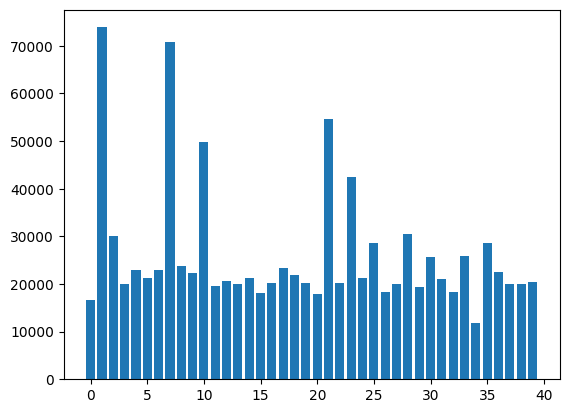

In [24]:
plt.bar(range(len(nan_counts)), nan_counts)

<BarContainer object of 40 artists>

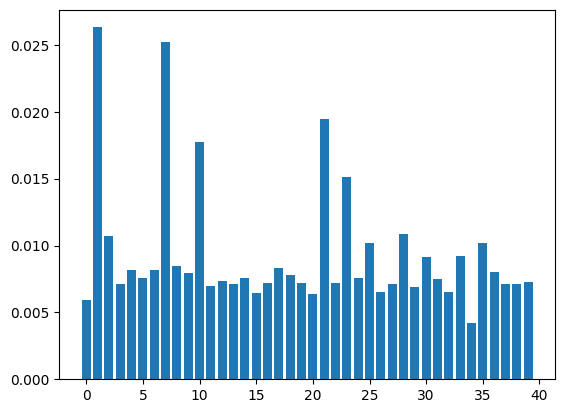

In [26]:
plt.bar(range(len(nan_counts)), nan_counts / len(raw_data))